# Titanic Yolcularının Analizi ve Yaşam Tahmini
Semih ENSER

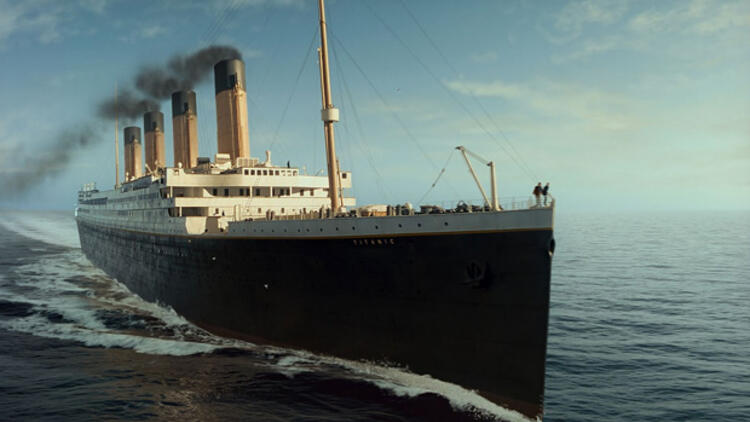

Kütüphanlerin YÜklenmesi / Loading Libraries

In [3]:
# veri analizi / data analysis 
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import MinMaxScaler

# görselleştirme /visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import plotly.graph_objects as go

# makine öğrenimi /machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras import models
from sklearn import metrics

Veriyi yükleyelim.

In [4]:
train_df = pd.read_csv('/content/train.csv')#eğitim verisi
test_df = pd.read_csv('/content/test.csv')#test verisi

combine = [train_df, test_df]#her 2 veri kümesinde de değişiklik yapabilmek için

Verinin kolonlarını inceleyelim.

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Survived: hayatta kalma(0 = Hayır, 1 =Evet)  
Pclass: bilet sınıfı(1 = 1., 2 = 2., 3 = 3.)  
Sex: cinsiyet  
Sibsp: Titanik’teki kardeş/eş sayısı  
Parch:Titanik’teki ebeveynlerin/çocukların sayısı  
Ticket: bilet numarası  
Fare: ücret  
Cabin: kabin numarası  
Embarked: biniş limanı

Elimizdeki bazi veriler kategorik bazılari ise nümerik. Bunları inceleyelim. 

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Göründüğü gibi 


* Kategorik veriler: ''Survived, Sex, and Embarked'' . Ayrıca ''Pclass'' sıralı (ordinal) bir ver.
*   Numerik veirler: Sürekli(Continous) " Age, Fare"- - Ayrık(Discrete): "SibSp, Parch"

Train ve Test verisindeki NaN değerleri gözden geçirelim.

In [8]:
print("Null distribution")
train_df.isnull().sum().sort_values(ascending = False).to_frame().T

Null distribution


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
0,687,177,2,0,0,0,0,0,0,0,0,0


In [9]:
print("Null distribution")
test_df.isnull().sum().sort_values(ascending = False).to_frame().T

Null distribution


,Cabin,Age,Fare,Embarked,Ticket,Parch,SibSp,Sex,Name,Pclass,PassengerId
0,327,86,1,0,0,0,0,0,0,0,0


Kabin ve Bilet numaraları gibi hayatta kalmayla alakası olmayan ve fazlaca Null değer bulunduran kolonları atalım. Diğer null değerleriyle sonra ilgileneceğiz.

In [10]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [11]:
print('#'*50)
train_df.info()
print('#'*50)
test_df.info()
print('#'*50)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int6

## Ayrıntılı Olarak Keşifsel Veri Analizine Başlayalım

In [12]:
colors = ['red', 'green']
labels = ['Non-Suvivor','Suvivor']
values = train_df['Survived'].value_counts()/train_df['Survived'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Titanic Survivor",
    title_font_color="white",
    paper_bgcolor="black",
    plot_bgcolor='white',
    font_color="white",
)
fig.show()

Text(0.5, 1.0, 'Correlation Plot')

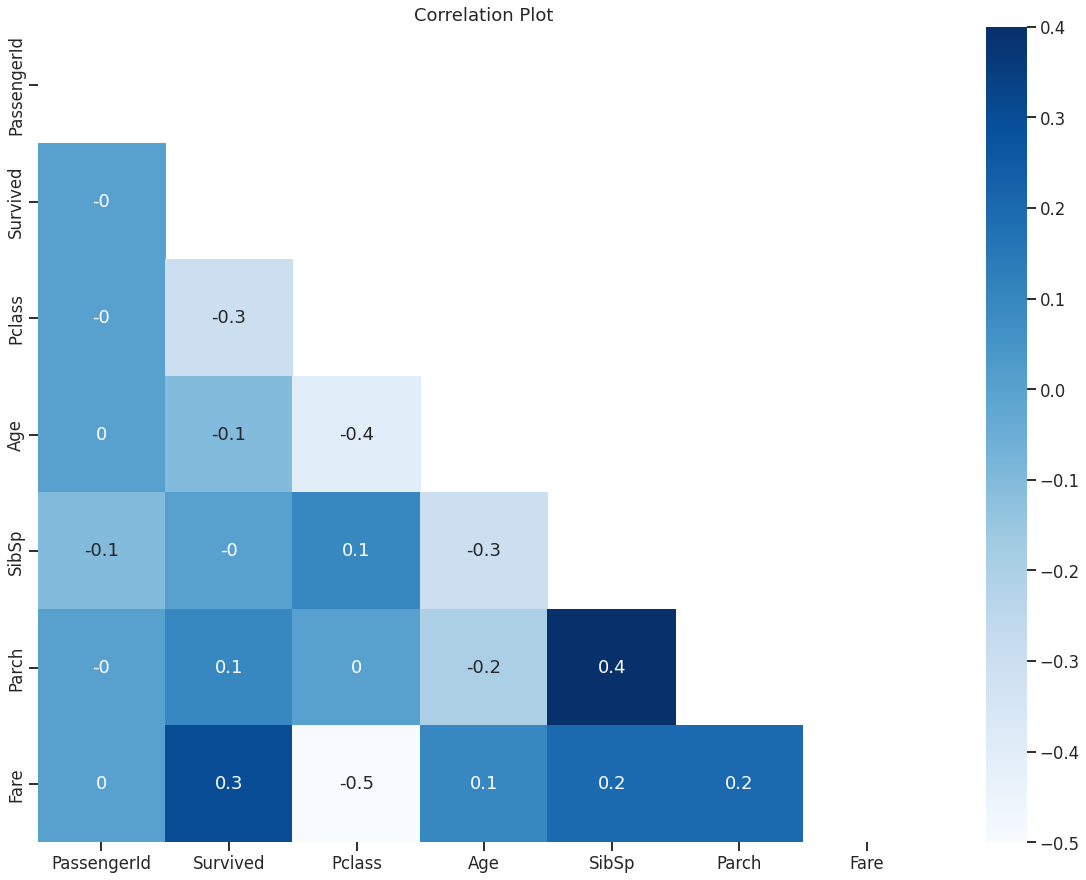

In [13]:
corr=train_df.corr().round(1)
plt.figure(figsize=(20, 15))
sns.set(style="ticks", context="talk",font_scale = 1)
#plt.style.use("dark_background")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues',mask=mask,cbar=True)
plt.title('Correlation Plot')

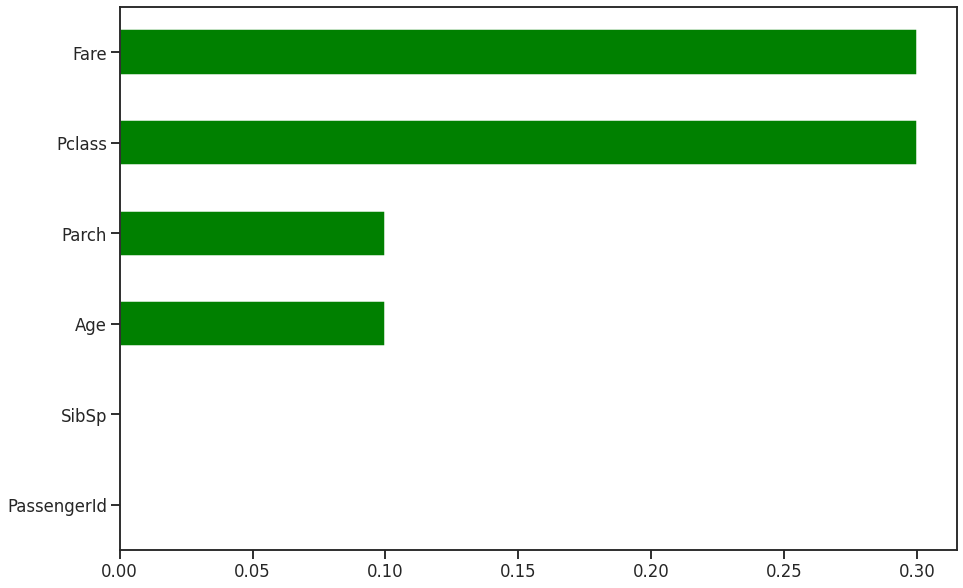

In [14]:
plt.figure(figsize=(15, 10))
sns.set(style="ticks", context="talk",font_scale = 1)
#plt.style.use("dark_background")
abs(corr['Survived']).sort_values()[:-1].plot.barh(color='Green')

### Yaş

In [15]:
print("Train verisindeki en yaşlı yolcu:",train_df["Age"].max(),"Test verisindeki en yaşlı yolcu:",test_df["Age"].max())

Train verisindeki en yaşlı yolcu: 80.0 Test verisindeki en yaşlı yolcu: 76.0


In [16]:
print("Train verisindeki en genç yolcu:",train_df["Age"].min(),"Test verisindeki en yaşlı genç:",test_df["Age"].min())

Train verisindeki en genç yolcu: 0.42 Test verisindeki en yaşlı genç: 0.17


In [17]:
train_yas_ort=train_df["Age"].mean()
test_yas_ort=test_df["Age"].mean()
print("Tüm verideki ortalama yaş:",(train_yas_ort+test_yas_ort)/2)

Tüm verideki ortalama yaş: 29.985854004252303


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



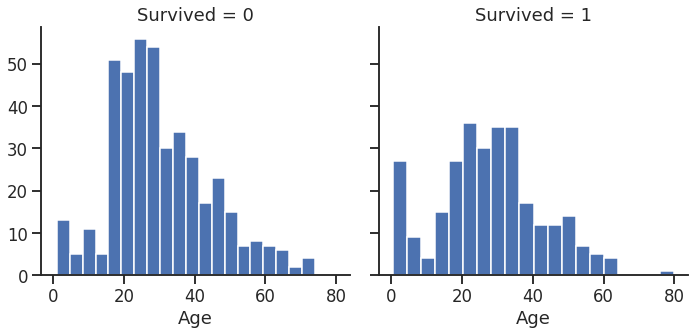

In [18]:
g = sns.FacetGrid(train_df, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=20)

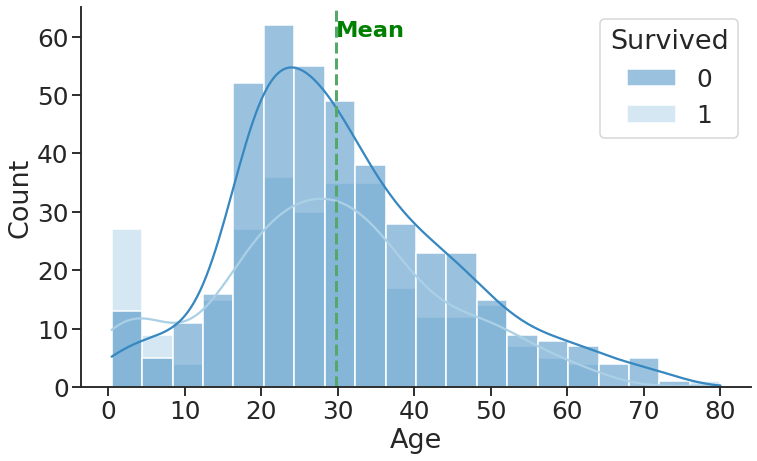

In [19]:
rcParams['figure.figsize'] = 12,7
sns.set(style="ticks", context="talk",font_scale = 1.5)
#plt.style.use("dark_background")
ax = sns.histplot(x="Age", hue="Survived", data=train_df,palette = 'Blues_r',kde=True)
plt.axvline(x=train_df['Age'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(train_df['Age'].mean(), 60, "Mean", horizontalalignment='left', size='small', color='Green', weight='semibold')
sns.despine()

Çıkarımlar:

*   Bebekler (Yaş <=4) yüksek hayatta kalma oranına sahip.
*   En yaşlı yolcu (Yaş = 80) hayatta kalmış.
*   15-25 yaşındaki çok sayıda kişi hayatta kalamamış.





### Cinsiyet

In [20]:
train_df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",male,S
freq,1,577,644


In [21]:
print("Train verisinin %{} 'i erkek".format(577/894*100))

Train verisinin %64.5413870246085 'i erkek


In [22]:
test_df.describe(include=['O'])

,Name,Sex,Embarked
count,418,418,418
unique,418,2,3
top,"Colbert, Mr. Patrick",male,S
freq,1,266,270


In [23]:
print("Test verisinin %{} 'i erkek".format(266/418*100))

Test verisinin %63.63636363636363 'i erkek


In [24]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Kadınların %74'ü hayatta kalırken, Erkeklerin sadece %18'i hayatta kalabilmiş.

### Pclass, SibSp, Parch

In [25]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


PClass=1 için bir korolesyon var denebilir.

In [26]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp= 5,6 için bir korolesyon yok denebilir.

In [27]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch=3 için bir korolesyon var denebilir.

### Embarked,Fare

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



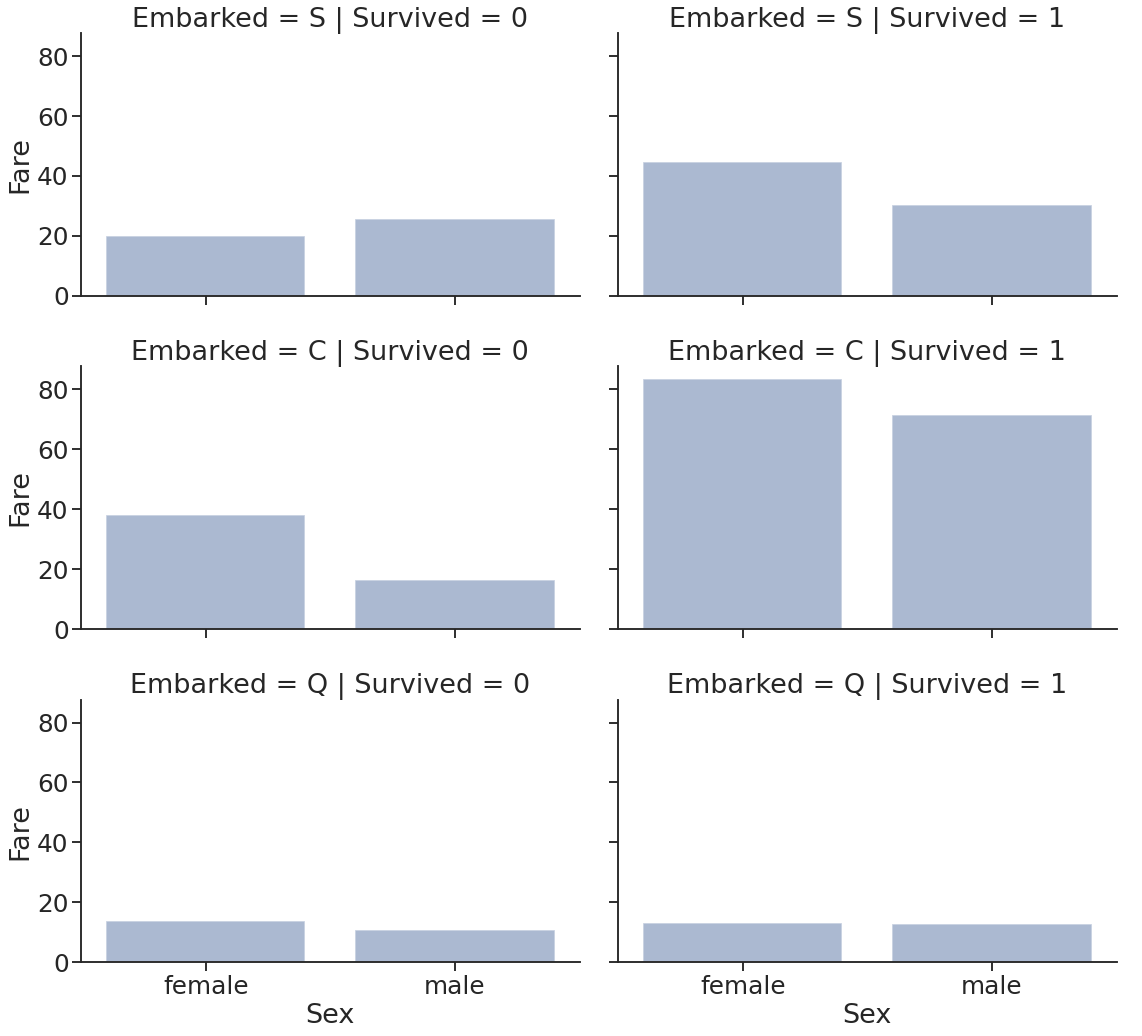

In [28]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=5, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Çıkarım:

* Bilete yüksek para ödeyen yolcuların hayatta kalma olasığılı yüksek.


In [29]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


Bazı ünvanlar çok seyrek sayıda var. Düzenleyelim.


In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Analizi kolaylaştırmak adına kategorik veriyi sıralı veriye dönüştürelim.

In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Pessenger ID özelliği zaten bir işe yaramıyordu. Ünvanları aldığımız için isim bilgisine de ihtiyacımız yok. Kurtulalım.

In [32]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

Cinsiyet verisini de kadın =1 erkek=0 olarak sayısal veriye dönüştürelim.

In [33]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



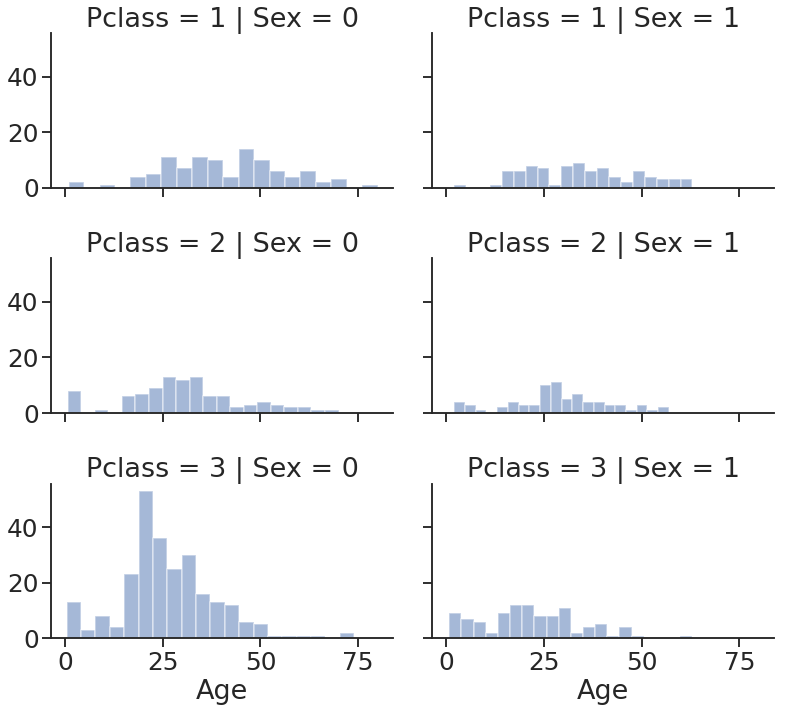

In [120]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=3.5, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Yaş bilgisi model için çok önemli fakat bazı kişilerin yaş verisi eksik. Bunu doldurmanın bir çok farklı yolu olsa da kişisel olarak en verimli olarak gördüğümü seçtim.

In [34]:
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Yaş aralıklarının hayatta kalma oranlarına bakalım.

In [35]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Özel olarak insanların yaşlarıyla ilgilenmek yerine belli yaş aralıklarına aynı katsayıyı vermek daha verimli olacaktır.

In [36]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Artık yaş aralıkları sütünü işimize yaramayacak.Çıkaralım.

In [37]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Kardeş,ebeveyn,aile boyutu gibi sütünların ayrı ayrı olması manasız. Hepsini aile boyutu olarak tek sütünda birleştirelim.

In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Aile boyutunun hayatta kalma oranına baktık.Pek de anlam çıkarmak mümkün değil.Peki ya yolculuğu yalnız yapanlar birden fazla kişiyle yapanlar olarak baksak? Verimli bir feature olabilir. Deneyelim.

In [39]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1 #

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


İstediğimize ulaştık.Artık eski feature'ları çıkartabiliriz (Parch,Sibsp,FamilySize)

In [40]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [41]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Embarked yolcuların bindiği limanlar S, Q, C diye 3 farklı değer alıyor. Train datasetinde 2 kayıp değer va bunları en çok binilen liman olduğunu varsayarak dalduralım.

In [42]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

En çok S limanından binilmiş.2 kayıp değere S limanını atayalım.

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) 

Limanlara göre hayatta kalma oranlarına bakalım.

In [44]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


C limanında binenlerin hayatta kalma oranları gerçekten yüksek, diğer 2 limanlardan binenlerin hayatta kalma oranları arasında pek de bir fark yok. C limanına 1 diğerlerine 0 değerini atayalım.

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


Fare özniteliğinin eksik değerlerini medyan değerlerle tamamlayalım.

In [46]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,7.8292,2,1,1,6
1,3,1,2,7.0000,0,3,0,6
2,2,0,3,9.6875,2,1,1,6
3,3,0,1,8.6625,0,1,1,3
4,3,1,1,12.2875,0,3,0,3


Bilete verilen ücretin ayrıtnılı olarak önemi yok.Yakın ücreti ödeyen insanları birleştirelim. 

Ödenen ücretleri aralıklara bölelim.

In [47]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Aralıklara göre verilen ücretleri sınıflandıralım.

In [48]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## Modellerin Oluşturulması.

Problemimiz sınıflandırma ve regresyon problemi.

Çıktımız ile özniteliklerimiz arasındaki bağlantıyı bulmaya çalışıyoruz. Yani cinsiyet yaş veya bindikleri limana göre yolcuların hayatta kalıp kalmadığını anlamak istiyoruz.
Verimiz şuanda etiketli olduğunun supervised learning kullanacağız.

Sonuç olarak, Supervised learning, Sınıflandırma,Regresyon başlıklarını elde ettğimiz anda kullanabileceğimiz modelleri bulmuş oluyoruz.

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
*Decision Tree
*Random Forrest
*Perceptron
*Artificial neural network
*RVM or Relevance Vector Machine

Verimizin x_train y_train x_test x_train değerlerini oluşturalım. Bunun için x ve y trainden hayatta kalma sütününü çıkarmamız yeterli olacak.

In [49]:
titanic_df = pd.concat([train_df, test_df], ignore_index = True, sort = False)

In [50]:
tr_idx = titanic_df['Survived'].notnull()
y_titanic_df = titanic_df[tr_idx]['Survived']
X_titanic_df= titanic_df[tr_idx].drop('Survived',axis=1)

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
test_size=0.2, random_state=11)

In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Logistic Regression başarı oranı:",acc_log)

Logistic Regression başarı oranı: 78.93


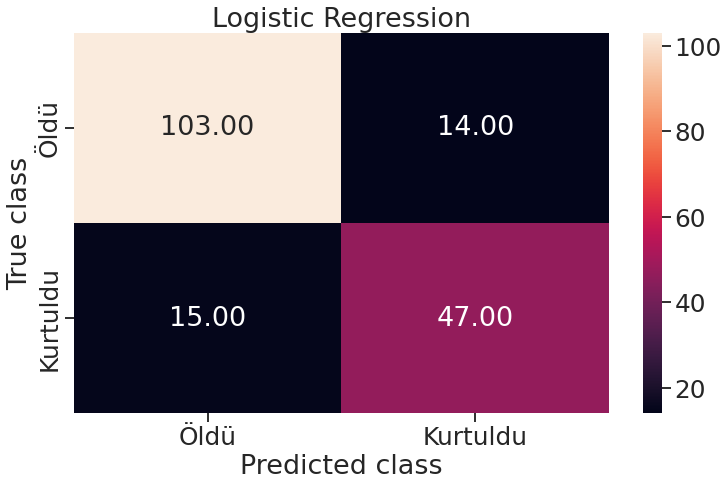

In [53]:
logreg_cm = metrics.confusion_matrix(Y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

Özniteliklerini oluştururkenki kararlarımızı doğrulamak için Logistic Regressionu kullanabiliriz. Karar fonksiyonunu özniteliklerinin katsayılarını hesaplarsak sonuçları görmüş oluşuruz.

In [54]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.042663
5,Title,0.401366
2,Age,0.232975
4,Embarked,0.200132
6,IsAlone,0.084706
3,Fare,-0.070603
7,Age*Class,-0.239110
0,Pclass,-0.755257


Pozitif katsayılar log-odds'u artıracağından olasılıkları da artıracaktır.

Negatif katsayılar da aynı mantıkla olasılığı düşürecek

* Cinsiyet değeri çok yüksek bir katsayı.Bu değer erkek[0]'dan kadın[1]' yükseldikçe hayatta kalma oranı da çok yükseliyor.
* PClass değeri arttıkça da hayatta kalma olasılığı bir o kadar düşüyor.

In [55]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVM başarı oranı:",acc_svc)

SVM başarı oranı: 77.67


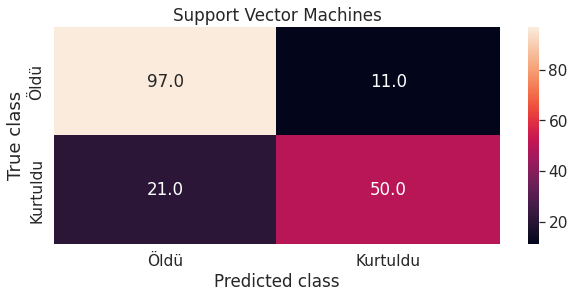

In [56]:
svm_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(svm_cm, annot=True, fmt='.1f',xticklabels = ["Öldü", "Kurtuldu",] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class',fontsize=18)
plt.xlabel('Predicted class')
plt.title('Support Vector Machines')
plt.savefig('svm_cm')

In [57]:
#KNN 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Knn başarı oranı:",acc_knn)

Knn başarı oranı: 83.99


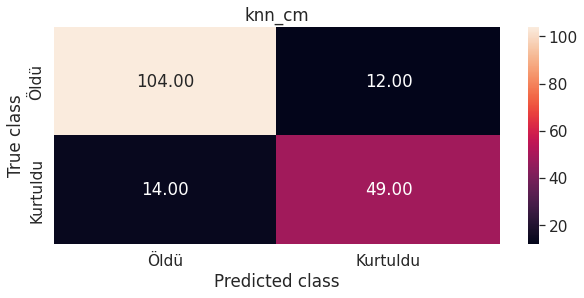

In [58]:
knn_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('knn_cm')
plt.savefig('knn_cm')

In [59]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("GaussianNB başarı oranı:",acc_gaussian)

GaussianNB başarı oranı: 71.21


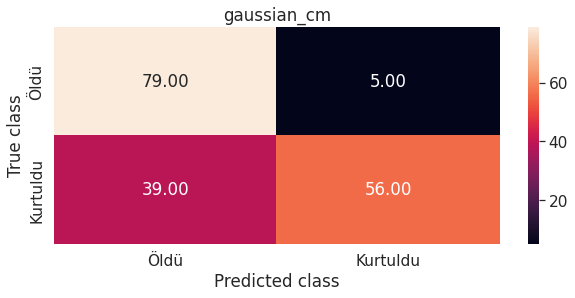

In [60]:
gaussian_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(gaussian_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('gaussian_cm')
plt.savefig('gaussian_cm')

In [61]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print("GaussianNB başarı oranı:",acc_perceptron)

GaussianNB başarı oranı: 72.61


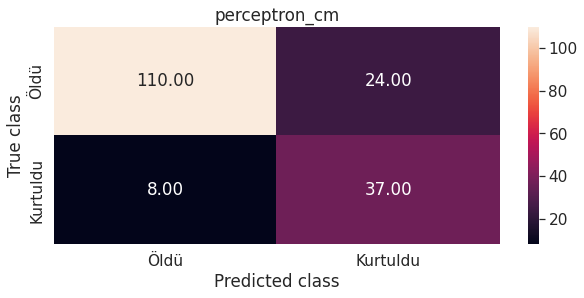

In [62]:
perceptron_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(perceptron_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('perceptron_cm')
plt.savefig('perceptron_cm')

In [63]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print("LinearSVC başarı oranı:",acc_linear_svc)

LinearSVC başarı oranı: 77.53


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



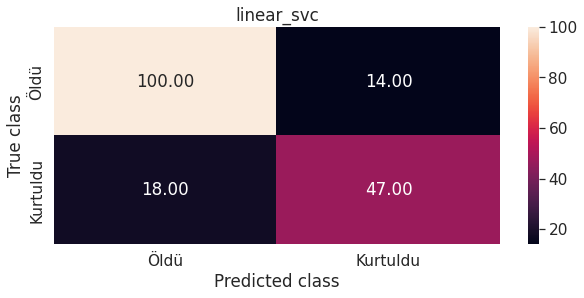

In [64]:
linear_svc_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(linear_svc_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('linear_svc')
plt.savefig('linear_svc')

In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print("Stochastic GD başarı oranı:",acc_sgd)

Stochastic GD başarı oranı: 73.74


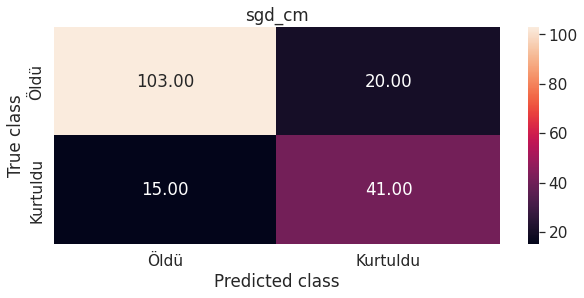

In [66]:
sgd_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(sgd_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('sgd_cm')
plt.savefig('sgd_cm')

In [67]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Decision Tree başarı oranı:",acc_decision_tree)

Decision Tree başarı oranı: 86.1


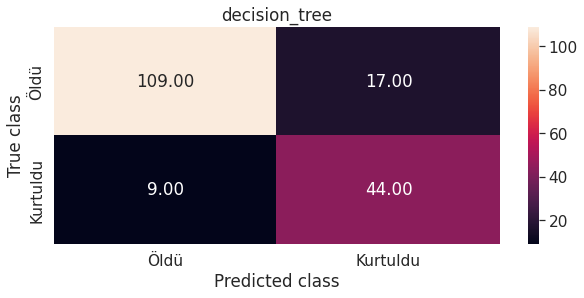

In [68]:
decision_tree_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(decision_tree_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('decision_tree')
plt.savefig('decision_tree')

In [69]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Random Forest başarı oranı:",acc_random_forest)

Random Forest başarı oranı: 86.1


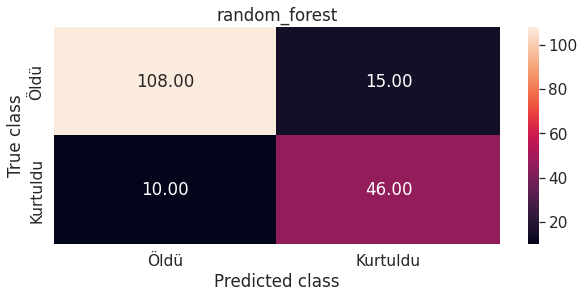

In [70]:
random_forest_cm = metrics.confusion_matrix(Y_pred, y_test)
fig = plt.figure(figsize = (10, 4))
sns.set(font_scale=1.4)
sns.heatmap(random_forest_cm, annot=True, fmt='.2f',xticklabels = ["Öldü", "Kurtuldu"] , yticklabels = ["Öldü", "Kurtuldu"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('random_forest')
plt.savefig('random_forest')

## Değerlendirme

In [71]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron,acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.10
8,Decision Tree,86.10
1,KNN,83.99
2,Logistic Regression,78.93
0,Support Vector Machines,77.67
7,Linear SVC,77.53
6,Stochastic Gradient Decent,73.74
5,Perceptron,72.61
4,Naive Bayes,71.21


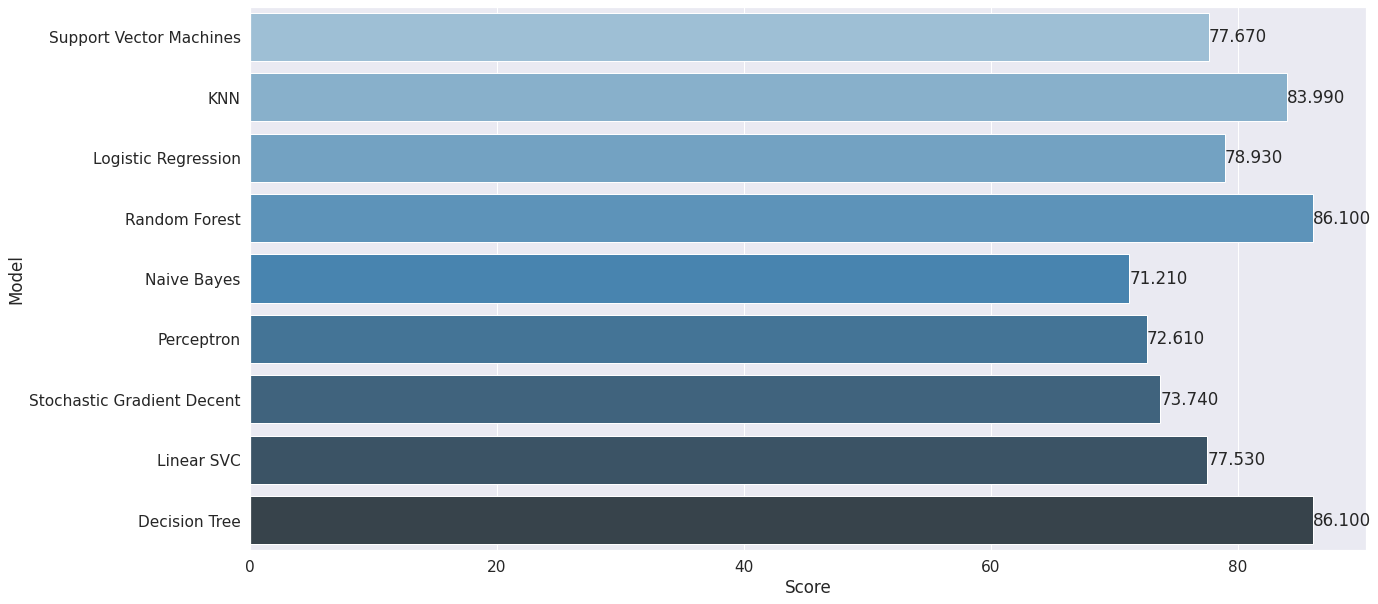

In [72]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
fig = plt.figure(figsize = (20, 10))
sns.set(font_scale=1.4)               
ax=sns.barplot(x="Score", y="Model", data=models, palette="Blues_d")
labels(ax)